# Generating text using Recurrent Neural Network

## Preprocessing data

In [1]:
from tensorflow.keras.preprocessing.text import Tokenizer

In [2]:
tokenizer = Tokenizer()

In [3]:
with open('data/irish_song.txt', 'r') as f:
    corpus = f.read().lower().splitlines()


tokenizer.fit_on_texts(corpus)
total_words = len(tokenizer.word_index) + 1


In [4]:
input_sequences = []
for line in corpus:
    token_list = tokenizer.texts_to_sequences([line])[0]
    for i in range(1, len(token_list)):
        n_gram_sequence = token_list[ :i+1]
        input_sequences.append(n_gram_sequence)
        

### Padding

In [5]:
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [6]:
import numpy as np

In [7]:
max_sequence_len = max([len(x) for x in input_sequences])
input_sequences = np.array(pad_sequences(input_sequences, maxlen=max_sequence_len, padding='pre'))


### Splitting the last word from the rest of the sentence

In [8]:
xs = input_sequences[ : , :-1]
labels = input_sequences[ : , -1]

### Convert label (ys) to be categorical and One Hot Encoded

In [9]:
import tensorflow

In [10]:
ys = tensorflow.keras.utils.to_categorical(labels, num_classes=total_words)

# Building the RNN

In [11]:
import tensorflow as tf

In [12]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Bidirectional
from tensorflow.keras.optimizers import Adam

In [13]:
model = Sequential()
model.add(Embedding(total_words, 100, input_length=max_sequence_len-1))
model.add(Bidirectional(LSTM(50)))
model.add(Dense(total_words, activation='softmax'))
adam = Adam(lr=0.01)



In [14]:
model.compile(loss='categorical_crossentropy', optimizer=adam, metrics=['accuracy'])

In [15]:
history = model.fit(xs, ys, epochs=25, verbose=1)

Epoch 1/25
14/14 [==============================] - 3s 32ms/step - loss: 5.5426 - accuracy: 0.0211
Epoch 2/25
14/14 [==============================] - 0s 36ms/step - loss: 5.1763 - accuracy: 0.0616
Epoch 3/25
14/14 [==============================] - 0s 35ms/step - loss: 4.8539 - accuracy: 0.0802
Epoch 4/25
14/14 [==============================] - 0s 34ms/step - loss: 4.3516 - accuracy: 0.1243
Epoch 5/25
14/14 [==============================] - 0s 28ms/step - loss: 3.6055 - accuracy: 0.2071
Epoch 6/25
14/14 [==============================] - 0s 31ms/step - loss: 2.8136 - accuracy: 0.3673
Epoch 7/25
14/14 [==============================] - 0s 31ms/step - loss: 2.0710 - accuracy: 0.5300
Epoch 8/25
14/14 [==============================] - 0s 31ms/step - loss: 1.5393 - accuracy: 0.6079
Epoch 9/25
14/14 [==============================] - 0s 34ms/step - loss: 1.0547 - accuracy: 0.7805
Epoch 10/25
14/14 [==============================] - 0s 29ms/step - loss: 0.7679 - accuracy: 0.8798
Epoch 11/

### Printing model summary

In [16]:
print(model.summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 10, 100)           26300     
_________________________________________________________________
bidirectional (Bidirectional (None, 100)               60400     
_________________________________________________________________
dense (Dense)                (None, 263)               26563     
Total params: 113,263
Trainable params: 113,263
Non-trainable params: 0
_________________________________________________________________
None


### Plots

In [17]:
import matplotlib.pyplot as plt


def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.show()

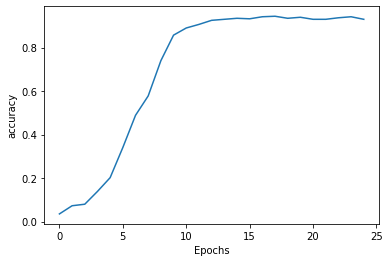

In [18]:
plot_graphs(history, 'accuracy')

### Generating text

In [19]:
seed_text = "I've got a bad feeling about this"
next_words = 100
  
for _ in range(next_words):
	token_list = tokenizer.texts_to_sequences([seed_text])[0]
	token_list = pad_sequences([token_list], maxlen=max_sequence_len-1, padding='pre')
	predicted = model.predict_classes(token_list, verbose=0)
	output_word = ""
	for word, index in tokenizer.word_index.items():
		if index == predicted:
			output_word = word
			break
	seed_text += " " + output_word
print(seed_text)

/home/amin/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '
I've got a bad feeling about this you but listen i'll make your eyes glisten glisten glisten glisten glisten glisten glisten glisten wall he'd got go further further further further glisten glisten glisten glisten fall of the near being strangled strangled strangled academy glisten glisten glisten hearty al al the girls they got all entangled entangled entangled ructions ball ball al al al he hadn't a shilling man again again again agai